In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

MODEL_SLUG = "DQN-400m-testCourse-07-12-2023_17:30"

FILE_PATH = f"./logs/{MODEL_SLUG}.csv"
episodes = pd.read_csv(FILE_PATH)

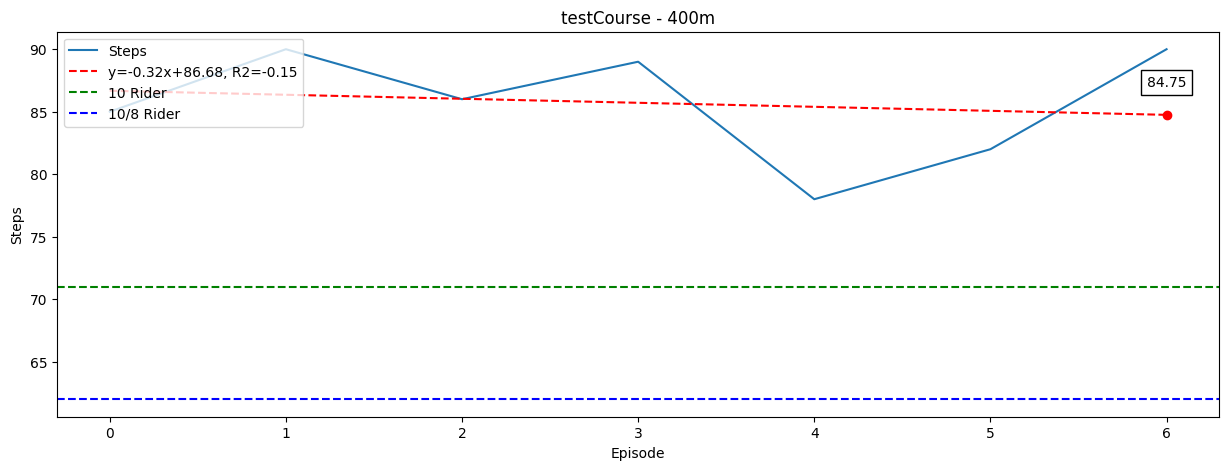

In [22]:
plt.rcParams['figure.figsize'] = [15, 5]

fig, axs = plt.subplots(1, 1)

# ---------------------------------------------

axs.plot(episodes['episode'], episodes['steps'])
axs.set_title("testCourse - 400m")
axs.set_ylabel("Steps")
axs.set_xlabel("Episode")

# Fit a line to the rolling average
x = episodes['episode']
y = episodes['steps']
z2 = np.polyfit(x, y, 1)
p2 = np.poly1d(z2)
axs.plot(x, p2(x), "r--")

# Add a horizontal line at 71 steps for the "10 Rider"
axs.axhline(y=71, color='g', linestyle='--')

# Add a horizontal line at 62 steps for the "10/8 Rider"
axs.axhline(y=62, color='b', linestyle='--')

# Plot current step as a point
current_step = p2(x.iloc[-1])
axs.plot(x.iloc[-1], current_step, 'ro')
# Add text to the point
axs.text(x.iloc[-1], current_step + 2, f"{current_step:.2f}", ha='center', va='bottom', bbox=dict(facecolor='white', alpha=1))

# Add a legend
axs.legend(['Steps', f"y={p2[1]:.2f}x+{p2[0]:.2f}, R2={np.corrcoef(x, y)[0, 1]:.2f}", "10 Rider", "10/8 Rider"], loc='upper left')
